<a href="https://colab.research.google.com/github/samirsalman/Pneumonia-RX-Classifier/blob/main/PneumoniaDetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pneumonia Detector

## Normal, Virus or Bacterial Pneumonia Detector
In this project I create a Pneumonia RX Classifier. The dataset used is aviable at this URL:

https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

Categories of classification are:
- NORMAL -> No pneumonia RX
- PNEUMONIA_VIRUS -> RX with Virus Pneumonia
- PNEUMONIA_BACTERIA -> RX with Bacteria Pneumonia


# Install Kaggle plugin

We install kaggle plugin in order to download data with Kaggle APIs. 

For more info you can read this:

https://www.kaggle.com/general/74235

In [4]:
 ! pip install -q kaggle

In [5]:
from google.colab import files

files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle (1).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [6]:
# download dataset from kaggle

! kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

chest-xray-pneumonia.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
# unzip data

! unzip chest-xray-pneumonia.zip

Archive:  chest-xray-pneumonia.zip
replace chest_xray/__MACOSX/._chest_xray? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [8]:
#import statements 

import pandas as pd
import os
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

%matplotlib inline


Populating the interactive namespace from numpy and matplotlib


# Define HyperParameters like TRAINING flag and image HEIGHT and WIDTH

In [9]:
TRAINING = True

In [10]:
IMG_HEIGHT = 200
IMG_WIDTH = 200

# Create Dataset from Images
From images to dataset with image vectors and labels 

In [11]:
!pip install Pillow
from PIL import Image

def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]

    for subdir in os.listdir(os.path.join(img_folder)):
        for file in os.listdir(os.path.join(img_folder,subdir)):
          image_path= os.path.join(img_folder,  subdir, file)
          image= Image.open(image_path).convert('RGB')
          image = image.resize((IMG_HEIGHT, IMG_WIDTH))
          image=np.array(image)
          image = image.astype('float32')
          image.reshape(-1,IMG_HEIGHT,IMG_WIDTH,3)
          image /= 255 

          img_data_array.append(image)
          if subdir=="PNEUMONIA":
            pneumonia_class = f'PNEUMONIA_{file.split("_")[1].upper()}'
            class_name.append(pneumonia_class)
          else:
            class_name.append(subdir)

    return img_data_array, class_name



```
annotation_df = pd.read_csv("./train.csv")
annotation_df.head()
```



In [12]:
#Create dataset from imgs data

if TRAINING:
  img_data, class_name  = create_dataset("./chest_xray/train/")
else:
  img_data_train, class_name_train  = create_dataset("./chest_xray/train/")
  img_data_test, class_name_test  = create_dataset("./chest_xray/test/")


Streaming output truncated to the last 5000 lines.
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 

In [13]:
# get labels in dataset

if TRAINING: 
  np.unique(class_name)
else:
  np.unique(class_name_train)
  

In [14]:
# convert string label to integer label

def from_literal_label_to_integer(data, classes):
  labels = []
  for el in data:
      labels.append(classes[el])
  return labels      


In [15]:
# labels
classes = {'NORMAL':0, "PNEUMONIA_BACTERIA":1, "PNEUMONIA_VIRUS":2}

# convert string label to integer label
if TRAINING:
  class_name = from_literal_label_to_integer(class_name, classes)
else:
  class_name_test = from_literal_label_to_integer(class_name_test, classes)
  class_name_train = from_literal_label_to_integer(class_name_train, classes)

[1341 2530 1345]


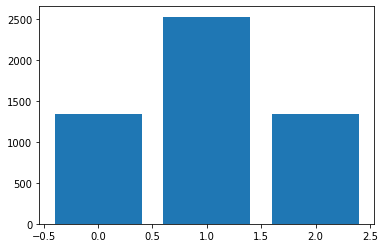

In [17]:
if TRAINING:
  #create a bar chart with labels distribution
  values = np.unique(class_name,return_counts=True)[1]
  print(values)
  plt.bar(x = np.unique(class_name),height=values,)




```
import pickle

filename = 'img_data'
outfile = open(filename,'wb')
pickle.dump(img_data,outfile)
outfile.close()
```



In [18]:
from sklearn.model_selection import train_test_split

if TRAINING:
  # split training data in train and test
  x_train, x_test, y_train, y_test = train_test_split(img_data, class_name, test_size=0.2, random_state=42)
else:
  # load training and test data if TEST step
  x_train, y_train = img_data_train, class_name_train
  x_test, y_test = img_data_test, class_name_test


# Create the CNN 



In [19]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, MaxPooling2D
from keras.layers.convolutional import Conv2D 

def create_model(num_classes, width, height, nb_filters=32, kernel_size =(3,3), pool_size =(2,2)):


  input_shape = (height, width, 3)
  model = Sequential()

  model.add(Conv2D(nb_filters, kernel_size,
                  padding='valid',
                  input_shape=input_shape))

  model.add(Activation('relu'))

  model.add(Conv2D(nb_filters, kernel_size))

  model.add(Activation('relu'))
  #model.add(Conv2D(nb_filters, kernel_size))
  #model.add(Activation('relu'))

  model.add(MaxPooling2D(pool_size=pool_size))

  model.add(Dropout(0.3))

  model.add(Flatten())

  model.add(Dense(units=128))

  model.add(Activation('relu'))

  model.add(Dropout(0.20))

  model.add(Dense(units=num_classes))

  model.add(Activation('softmax'))

  return model

In [20]:
model = create_model(3,200,200)

In [21]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 198, 198, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 196, 196, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 196, 196, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 98, 98, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 98, 98, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 307328)            0

# Training Step

In [23]:
# define number of epochs
EPOCHS=6

history = model.fit(
  x=np.array(x_train, np.float32),
  y=np.array(y_train, np.float32),
  validation_data=(np.array(x_test, np.float32),np.array(y_test, np.float32)),
  batch_size=8,
  epochs=EPOCHS
)

Epoch 1/6
522/522 [==============================] - 12s 24ms/step - loss: 0.8704 - accuracy: 0.7040 - val_loss: 0.5373 - val_accuracy: 0.7778
Epoch 2/6
522/522 [==============================] - 12s 23ms/step - loss: 0.5285 - accuracy: 0.7802 - val_loss: 0.5308 - val_accuracy: 0.7720
Epoch 3/6
522/522 [==============================] - 12s 23ms/step - loss: 0.4415 - accuracy: 0.8104 - val_loss: 0.5866 - val_accuracy: 0.7414
Epoch 4/6
522/522 [==============================] - 12s 23ms/step - loss: 0.3263 - accuracy: 0.8583 - val_loss: 0.5963 - val_accuracy: 0.7596
Epoch 5/6
522/522 [==============================] - 12s 23ms/step - loss: 0.2519 - accuracy: 0.8965 - val_loss: 0.9202 - val_accuracy: 0.7452
Epoch 6/6
522/522 [==============================] - 12s 24ms/step - loss: 0.2394 - accuracy: 0.9108 - val_loss: 0.7966 - val_accuracy: 0.7500


# Study Errors

In this section we are going to study all model errors.
get_prediction function allow you to see a specific image with its prediction and its true label.

In [24]:
# get predictions over test set
preds = model.predict(np.array(x_test, np.float32))

In [25]:
!pip install Pillow
from PIL import Image


In [26]:
from numpy import asarray

# function that allow us to see predicted image with true label
def get_prediction(index,classes):
  data = asarray(x_test[index])

  data_image = Image.fromarray((data * 255).astype(np.uint8))
  data_image.resize((400,400))
  data_image.show()
  cv2.waitKey(5000)

  imshow(data_image)
  res = np.argmax(preds[index])
  print(f'Prediction: {list(classes.keys())[res]}')  
  print(f'True label: {list(classes.keys())[y_test[index]]}')



In [27]:
# extract all errors in test-set
def get_errors(preds,classes):
  errors = []
  for el in range(len(preds)):
    res = np.argmax(preds[el])
    if res != y_test[el]:
      errors.append(el)
  return errors


Prediction: PNEUMONIA_BACTERIA
True label: PNEUMONIA_VIRUS


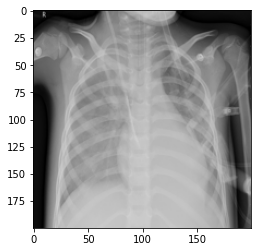

In [28]:
errors = get_errors(preds,classes)
get_prediction(errors[2],classes)

#Prediction of External Image

You can upload a new image and classify it with predict_external_image function

In [29]:
# predict external image

def predict_external_image(img_path):
  image= Image.open(img_path).convert('RGB')
  image = image.resize((IMG_HEIGHT, IMG_WIDTH))
  image=np.array(image)
  image = image.astype('float32')
  image /= 255

  # in order to predict it
  image = np.expand_dims(image, axis = 0)
 
  # model prediction
  pred = model.predict(np.array(image, np.float32))

  #see image
  data_image = Image.open(img_path)
  data_image = data_image.resize((400,400))
  data_image.show()

  imshow(data_image)
  
  res = np.argmax(pred)
  print(f'Prediction: {list(classes.keys())[res]}')  


Prediction: PNEUMONIA_VIRUS


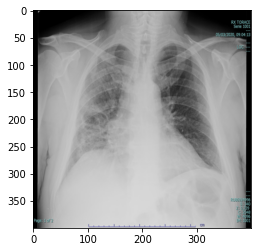

In [31]:
predict_external_image("covid.jpeg")